Goals of this project:
1. How much impact does being late or too spaced out at the first stop have downstream?
2. What is the impact of the layover at the start of the trip (the difference between the first top arrival and departure time)? Does more layover lead to more stable headways (lower values for % headway deviation)?
3. How closely does lateness (ADHERENCE) correlate to headway?
4. What is the relationship between distance or time travelled since the start of a given trip and the headway deviation? Does headway become less statble the further along the route the bus has travelled?
5. How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.
6. How does direction of travel, route, or location affect the headway and on-time performance?
7. How does time of day or day of week affect headway and on-time performance? Can you detect an impact of school schedule on headway deviation (for certain routes and at certain times of day)?
8. Does weather have any effect on headway or on-time performance? To help answer this question, the file bna_2022.csv contains historical weather data recorded at Nashville International Airport.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Access, Display DataFrames

In [65]:
# Access 'Headway Data.csv'
headway = pd.read_csv('../data/Headway Data.csv')
headway.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,15.983333,1.983333,0,0,1,0,0.0,0,2,12.650000
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,17.333333,3.333333,0,0,1,0,0.0,0,11,0.000000
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,23,22.416666
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,24,5.766666
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,25,0.000000


In [66]:
# Access 'bna_2022.csv'
bna_2022 = pd.read_csv('../data/bna_2022.csv')
bna_2022.head()

,key,class,expire_time_gmt,obs_id,obs_name,valid_time_gmt,day_ind,temp,wx_icon,icon_extd,...,clds,water_temp,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction
0,KBNA,observation,1641027180,KBNA,Nashville,1641019980,N,71,26,2600,...,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KBNA,observation,1641030780,KBNA,Nashville,1641023580,N,72,26,2600,...,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KBNA,observation,1641034380,KBNA,Nashville,1641027180,N,73,26,2600,...,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KBNA,observation,1641037980,KBNA,Nashville,1641030780,N,73,26,2600,...,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KBNA,observation,1641041580,KBNA,Nashville,1641034380,N,73,26,2600,...,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# Access 'bna_weather.csv'
bna_weather = pd.read_csv('../data/bna_weather.csv')
bna_weather.head()

,Date,key,class,expire_time_gmt,obs_id,obs_name,valid_time_gmt,day_ind,temp,wx_icon,...,clds,water_temp,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction
0,2021-11-01 00:53:00,KBNA,observation,1635753180,KBNA,Nashville,1635745980,N,51,26,...,OVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-11-01 01:30:00,KBNA,observation,1635755400,KBNA,Nashville,1635748200,N,50,29,...,SCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-11-01 01:53:00,KBNA,observation,1635756780,KBNA,Nashville,1635749580,N,49,33,...,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-11-01 02:53:00,KBNA,observation,1635760380,KBNA,Nashville,1635753180,N,48,33,...,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-11-01 03:53:00,KBNA,observation,1635763980,KBNA,Nashville,1635756780,N,47,33,...,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis

#### Categorical Variables (Bus Routes)

Look for data types using `.info()`

In [68]:
headway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981715 entries, 0 to 1981714
Data columns (total 30 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   CALENDAR_ID                int64  
 1   SERVICE_ABBR               int64  
 2   ADHERENCE_ID               int64  
 3   DATE                       object 
 4   ROUTE_ABBR                 int64  
 5   BLOCK_ABBR                 int64  
 6   OPERATOR                   int64  
 7   TRIP_ID                    int64  
 8   OVERLOAD_ID                int64  
 9   ROUTE_DIRECTION_NAME       object 
 10  TIME_POINT_ABBR            object 
 11  ROUTE_STOP_SEQUENCE        float64
 12  TRIP_EDGE                  int64  
 13  LATITUDE                   float64
 14  LONGITUDE                  float64
 15  SCHEDULED_TIME             object 
 16  ACTUAL_ARRIVAL_TIME        object 
 17  ACTUAL_DEPARTURE_TIME      object 
 18  ADHERENCE                  float64
 19  SCHEDULED_HDWY             float64
 20  AC

Count null values using `.isna().sum()`

In [69]:
headway.isna().sum()

CALENDAR_ID                       0
SERVICE_ABBR                      0
ADHERENCE_ID                      0
DATE                              0
ROUTE_ABBR                        0
BLOCK_ABBR                        0
OPERATOR                          0
TRIP_ID                           0
OVERLOAD_ID                       0
ROUTE_DIRECTION_NAME              0
TIME_POINT_ABBR                   0
ROUTE_STOP_SEQUENCE              41
TRIP_EDGE                         0
LATITUDE                          0
LONGITUDE                         0
SCHEDULED_TIME                    0
ACTUAL_ARRIVAL_TIME           54383
ACTUAL_DEPARTURE_TIME         54430
ADHERENCE                     54430
SCHEDULED_HDWY               432294
ACTUAL_HDWY                  473824
HDWY_DEV                     474368
ADJUSTED_EARLY_COUNT              0
ADJUSTED_LATE_COUNT               0
ADJUSTED_ONTIME_COUNT             0
STOP_CANCELLED                    0
PREV_SCHED_STOP_CANCELLED    402647
IS_RELIEF                   

In [15]:
# Identify the number of bus routes values within the dataset
headway['ROUTE_ABBR'].value_counts()

55    362259
56    355098
52    291150
23    250787
50    249880
3     216446
22    153074
7     103021
Name: ROUTE_ABBR, dtype: int64

In [18]:
# Identify the percentage of each route within the dataset
headway['ROUTE_ABBR'].value_counts(normalize = True)

55    0.182801
56    0.179187
52    0.146918
23    0.126550
50    0.126093
3     0.109222
22    0.077243
7     0.051986
Name: ROUTE_ABBR, dtype: float64

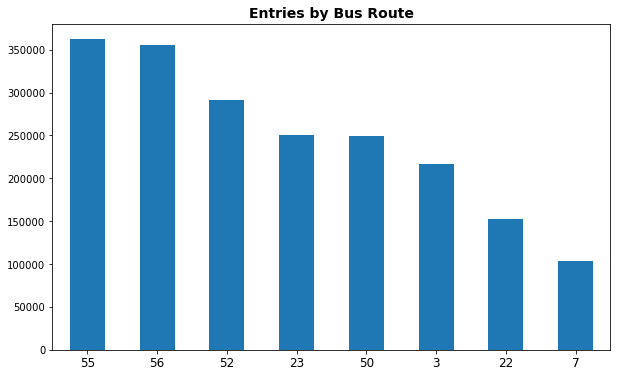

In [21]:
# Display the number of entries within the dataset
headway['ROUTE_ABBR'].value_counts().plot(kind = 'bar',
                                         figsize = (10,6))

plt.xticks(rotation = 0,
           fontsize = 12)                   
plt.title('Entries by Bus Route',
         fontsize = 14,
         fontweight = 'bold');

#### Numeric Variables

In [26]:
# Display the mean, median, max, min, standard deviation, and quartiles of adherence to the schedule
headway['ADHERENCE'].describe()

count    1.927285e+06
mean    -2.193849e+00
std      4.886912e+00
min     -5.067667e+02
25%     -3.400000e+00
50%     -1.383333e+00
75%     -1.333330e-01
max      7.883333e+01
Name: ADHERENCE, dtype: float64

### Edit, Transform

In [50]:
# Make a new 'headway' DataFrame with only the columns needed
headway_slim = headway.drop(headway.iloc[:, 22:30],axis = 1)
headway_slim.head(20)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,1,36.107575,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,0,36.138372,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,2,36.167091,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,1,36.161008,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,2,36.167091,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN
5,120211101,1,76447969,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,1,36.178360,-86.845441,04:42:00,04:29:30,04:41:50,0.166666,NaN,NaN,NaN
6,120211101,1,76447970,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,0,36.193454,-86.839981,04:46:00,04:46:58,04:46:58,-0.966666,NaN,NaN,NaN
7,120211101,1,76447971,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,0,36.182177,-86.814445,04:54:00,04:55:00,04:55:00,-1.000000,NaN,NaN,NaN
8,120211101,1,76447972,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,2,36.167091,-86.781923,05:10:00,05:05:26,05:05:26,4.566666,NaN,NaN,NaN
9,120211101,1,76447973,2021-11-01,22,2200,1352,298162,0,FROM DOWNTOWN,...,1,36.167091,-86.781923,05:15:00,05:05:26,05:16:49,-1.816666,NaN,NaN,NaN


In [63]:
# # Analyze the 'TRIP_EDGE' for Route 55 buses
# rt_55 = headway_slim.loc[headway_slim['ROUTE_ABBR'] == 55]
# rt_55.head(6)

#### Q1:
How much impact does being late or too spaced out at the first stop have downstream?

#### Q2:
> What is the impact of the layover at the start of the trip (the difference between the first top arrival and departure time)?

> Does more layover lead to more stable headways (lower values for % headway deviation)?

#### Q3:
How closely does lateness (ADHERENCE) correlate to headway?

#### Q4:
> What is the relationship between distance or time travelled since the start of a given trip and the headway deviation?

> Does headway become less statble the further along the route the bus has travelled?

#### Q5:
> How much of a factor does the driver have on headway and on-time performance?

> The driver is indicated by the OPERATOR variable.

#### Q6:
How does direction of travel, route, or location affect the headway and on-time performance?

#### Q7:
> How does time of day or day of week affect headway and on-time performance?

> Can you detect an impact of school schedule on headway deviation (for certain routes and at certain times of day)?

#### Q8:
> Does weather have any effect on headway or on-time performance?

> To help answer this question, the file bna_2022.csv contains historical weather data recorded at Nashville International Airport.